** How does screen time impact general mental wellness? **
Step 3: Bivariate EDA (Two Variables at a Time)
After univariate EDA, analyze relationships between two or more variables using:
Grouped summaries (e.g., df.groupby())
Cross-tabs (e.g., pd.crosstab())
Scatter plots, bar plots, boxplots, etc.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python
%matplotlib inline
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv("cleaned_data.csv")
df = df.set_index("user_id")
df.head()


,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
user_id,,,,,,,,,,,,,,
U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0


In [17]:
rel_col = ["screen_time_hours","mental_wellness_index_0_100"]
df[rel_col]

,screen_time_hours,mental_wellness_index_0_100
user_id,,
U0001,10.79,9.3
U0002,7.40,56.2
U0003,9.78,3.6
U0004,11.13,0.0
U0005,13.22,0.0
...,...,...
U0396,6.43,39.3
U0397,9.59,3.5
U0398,8.72,6.6


In [31]:
df[rel_col].describe()

,screen_time_hours,mental_wellness_index_0_100
count,400.000000,400.000000
mean,9.024900,20.326750
std,2.491058,20.376793
min,1.000000,0.000000
25%,7.372500,3.675000
50%,9.090000,14.800000
75%,10.495000,30.650000
max,19.170000,97.000000


Scatter box with and Without 0 in Mental wellnes 

In [21]:
df_new = df.drop(df[df['mental_wellness_index_0_100'] == 0].index)
df_new

,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
user_id,,,,,,,,,,,,,,
U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
U0006,28,Non-binary/Other,Self-employed,Hybrid,9.83,0.53,9.30,7.19,1,10.0,44.0,71,10.3,5.0
U0007,42,Non-binary/Other,Retired,Remote,6.02,2.82,3.20,7.44,2,6.1,64.8,141,4.7,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U0396,26,Female,Student,Remote,6.43,2.99,3.44,7.75,1,5.9,64.6,252,7.6,39.3
U0397,16,Male,Self-employed,Remote,9.59,5.44,4.15,5.57,1,10.0,47.4,99,7.0,3.5
U0398,40,Male,Student,Remote,8.72,2.36,6.36,7.56,1,9.4,57.3,193,10.1,6.6


In [24]:
(df['mental_wellness_index_0_100'] == 0).sum()

np.int64(61)

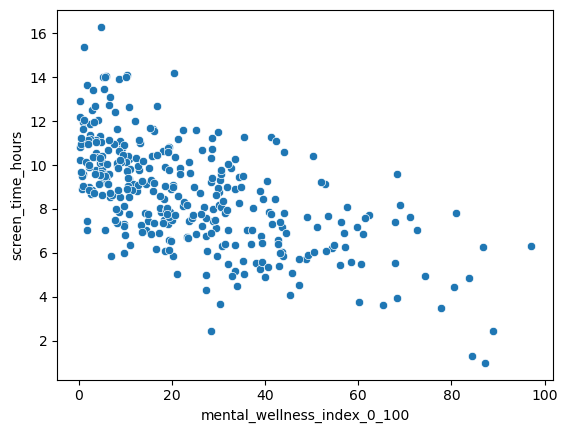

In [ ]:
#scatterplot without 0 in ,menatal welness index 
df_new = df.drop(df[df['mental_wellness_index_0_100'] == 0].index)
sns.scatterplot(data=df_new, x= 'mental_wellness_index_0_100' , y ='screen_time_hours')
plt.show()

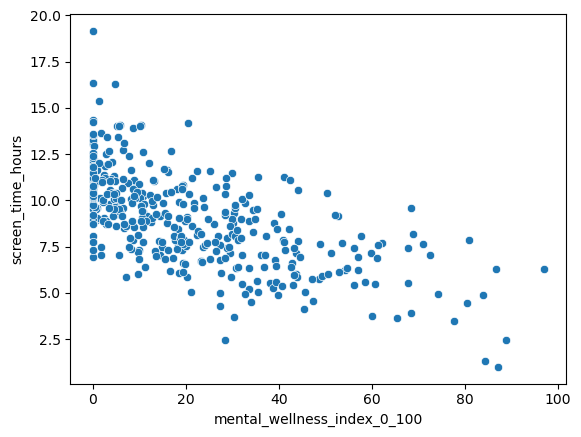

In [ ]:
#scatterplot with 0 included in metnal wellness 
sns.scatterplot(data=df, x= 'mental_wellness_index_0_100' , y ='screen_time_hours')
plt.show()

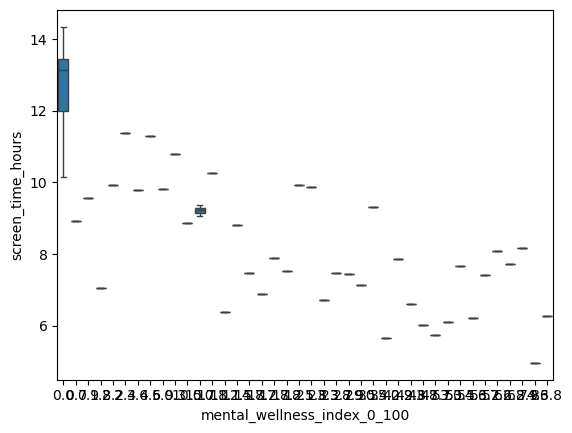

In [33]:
sns.boxplot(data=df.head(50), y='screen_time_hours' , x='mental_wellness_index_0_100', legend= False)
plt.show()

In [10]:
crosstab_relsut = pd.crosstab(df
crosstab_relsut

screen_time_hours,1.00,1.32,2.44,3.49,3.64,3.69,3.76,3.93,4.10,4.30,4.47,4.48,4.56,4.87,4.89,4.96,5.00,5.03,5.04,5.07,5.18,5.28,5.35,5.41,5.44,5.50,5.52,5.57,5.59,5.65,5.74,5.84,5.85,5.87,5.90,5.98,6.00,6.02,6.03,6.09,6.10,6.15,6.20,6.21,6.26,6.28,6.31,6.32,6.34,6.37,6.40,6.42,6.43,6.55,6.61,6.67,6.71,6.76,6.77,6.82,6.85,6.86,6.89,6.90,6.92,6.95,6.97,7.02,7.04,7.05,7.06,7.13,7.16,7.17,7.18,7.22,7.24,7.26,7.30,7.32,7.34,7.35,7.38,7.40,7.41,7.42,7.43,7.46,7.47,7.48,7.49,7.51,7.52,7.57,7.58,7.63,7.64,7.67,7.71,7.72,7.73,7.75,7.76,7.77,7.80,7.82,7.83,7.85,7.86,7.88,7.94,7.95,7.98,7.99,8.05,8.06,8.07,8.08,8.12,8.14,8.16,8.18,8.23,8.29,8.32,8.38,8.45,8.47,8.53,8.55,8.56,8.57,8.60,8.62,8.64,8.70,8.71,8.72,8.73,8.75,8.76,8.80,8.81,8.86,8.87,8.88,8.89,8.93,8.97,8.98,8.99,9.01,9.02,9.04,9.05,9.07,9.11,9.13,9.14,9.17,9.20,9.23,9.24,9.26,9.31,9.32,9.37,9.39,9.43,9.47,9.51,9.52,9.53,9.55,9.57,9.58,9.59,9.61,9.62,9.65,9.66,9.69,9.72,9.73,9.75,9.78,9.80,9.81,9.82,9.83,9.86,9.87,9.88,9.93,9.94,9.98,10.02,10.03,10.04,10.05,10.07,10.09,10.12,10.13,10.14,10.17,10.18,10.19,10.20,10.23,10.24,10.25,10.26,10.27,10.30,10.31,10.33,10.34,10.36,10.37,10.38,10.39,10.40,10.42,10.44,10.47,10.48,10.54,10.57,10.60,10.63,10.64,10.68,10.70,10.75,10.79,10.82,10.84,10.89,10.95,10.97,11.02,11.04,11.05,11.06,11.09,11.10,11.12,11.13,11.14,11.15,11.16,11.19,11.20,11.21,11.22,11.23,11.27,11.28,11.30,11.38,11.49,11.54,11.55,11.58,11.61,11.64,11.65,11.67,11.71,11.75,11.79,11.81,11.85,11.94,11.96,12.02,12.03,12.05,12.06,12.18,12.19,12.27,12.39,12.51,12.55,12.56,12.63,12.67,12.69,12.73,12.92,13.05,13.08,13.22,13.29,13.40,13.44,13.49,13.51,13.59,13.66,13.90,14.00,14.02,14.07,14.09,14.18,14.22,14.35,15.38,16.29,16.36,19.17
mental_wellness_index_0_100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,2,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,2,1,1,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1
0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,